In [2]:
from ModularCirc.Models.NaghaviModel import NaghaviModel, NaghaviModelParameters
from ModularCirc.Solver import Solver
from ModularCirc.HelperRoutines import activation_function_1, activation_function_2

import ModularCirc.StateVariable as sv
import matplotlib.pyplot as plt
import numpy  as np

Intro
-----
Notebook for comparing two activation functions.

In [5]:
TEMPLATE_TIME_SETUP_DICT = {
    'name'    :  'TimeTest',
    'ncycles' :  40,
    'tcycle'  :  800.,
    'dt'      :  1.0,
 }

The `parobj1` for activation function: `activation_function_1`

In [6]:
parobj1 = NaghaviModelParameters()
parobj1.set_chamber_comp('lv', tau=80.) # 80
parobj1.set_chamber_comp('la', tau=80.) # 80
parobj1.set_activation_function('lv', activation_func=activation_function_1)
parobj1.set_activation_function('la', activation_func=activation_function_1)

The `parobj2` for activation function: `activation_function_2`

In [7]:
parobj2 = NaghaviModelParameters()
parobj2.set_chamber_comp('lv', tau=200.) # 100.
parobj2.set_chamber_comp('la', tau=200.) # 100.
parobj2.set_activation_function('lv', activation_func=activation_function_2)
parobj2.set_activation_function('la', activation_func=activation_function_2)


Case 1: model and solver setup

In [8]:
model1 = NaghaviModel(TEMPLATE_TIME_SETUP_DICT, parobj=parobj1)
solver1 = Solver(model=model1)
solver1.setup()
solver1.solve()

Naghavi Model parameters set: 
 * Component - ao
  - r       : 3.200e+04
  - c       : 2.500e-03
  - l       : 0.000e+00
  - v_ref   : 1.000e+02
  - v       : 1.300e+02

 * Component - art
  - r       : 1.500e+05
  - c       : 2.500e-02
  - l       : 0.000e+00
  - v_ref   : 5.000e+01
  - v       : 1.092e+03

 * Component - ven
  - r       : 1.200e+03
  - c       : 1.000e+00
  - l       : 0.000e+00
  - v_ref   : 2.800e+03
  - v       : 3.780e+03

 * Component - av
  - r       : 8.000e+02
  - max_func : <function relu_max at 0x15f4300d0>

 * Component - mv
  - r       : 5.500e+02
  - max_func : <function relu_max at 0x15f4300d0>

 * Component - la
  - E_pas   : 6.000e+01
  - E_act   : 5.867e+01
  - V_ref   : 1.000e+01
  - activation_function : <function activation_function_2 at 0x15f430430>
  - t_max   : 1.500e+02
  - t_tr    : 2.250e+02
  - tau     : 2.500e+01
  - delay   : 1.000e+02
  - V       : 9.360e+01

 * Component - lv
  - E_pas   : 400
  - E_act   : 1.333e+02
  - V_ref   : 1.000

/Users/mbalmus/Desktop/Projects/Onboarding/MainProject/ModularCirc/ModularCirc/Solver.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [fun(*y[inds]) for fun, inds in zip(funcs, ids)]


Case 2: model and solver setup

In [9]:
model2 = NaghaviModel(TEMPLATE_TIME_SETUP_DICT, parobj=parobj2)
solver2 = Solver(model=model2)
solver2.setup()
solver2.solve()

Naghavi Model parameters set: 
 * Component - ao
  - r       : 3.200e+04
  - c       : 2.500e-03
  - l       : 0.000e+00
  - v_ref   : 1.000e+02
  - v       : 1.300e+02

 * Component - art
  - r       : 1.500e+05
  - c       : 2.500e-02
  - l       : 0.000e+00
  - v_ref   : 5.000e+01
  - v       : 1.092e+03

 * Component - ven
  - r       : 1.200e+03
  - c       : 1.000e+00
  - l       : 0.000e+00
  - v_ref   : 2.800e+03
  - v       : 3.780e+03

 * Component - av
  - r       : 8.000e+02
  - max_func : <function relu_max at 0x15f4300d0>

 * Component - mv
  - r       : 5.500e+02
  - max_func : <function relu_max at 0x15f4300d0>

 * Component - la
  - E_pas   : 6.000e+01
  - E_act   : 5.867e+01
  - V_ref   : 1.000e+01
  - activation_function : <function activation_function_2 at 0x15f430430>
  - t_max   : 1.500e+02
  - t_tr    : 2.250e+02
  - tau     : 2.500e+01
  - delay   : 1.000e+02
  - V       : 9.360e+01

 * Component - lv
  - E_pas   : 400
  - E_act   : 1.333e+02
  - V_ref   : 1.000

/Users/mbalmus/Desktop/Projects/Onboarding/MainProject/ModularCirc/ModularCirc/Solver.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [fun(*y[inds]) for fun, inds in zip(funcs, ids)]


KeyboardInterrupt: 

Model comparison
----

In [64]:
ind1 = -2*model1.time_object.n_c+1
ind2 = -1
t    = model1.time_object._sym_t[ind1:ind2].values
t   -= t[0]
tc   = model1.time_object._cycle_t[ind1:ind2]


PV loops

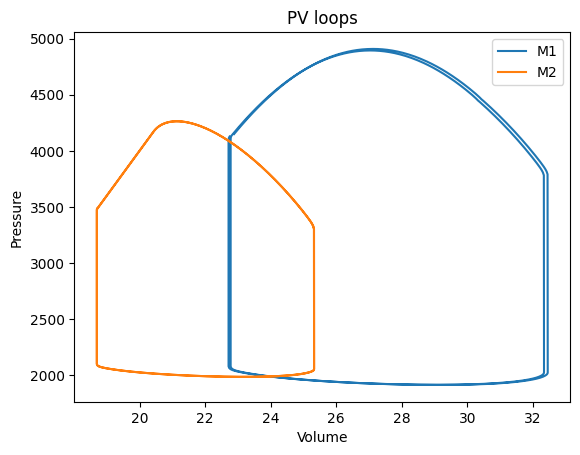

In [65]:
fig, ax = plt.subplots()
ax.plot(model1.commponents['lv'].V.values[ind1:ind2], 
        model1.commponents['lv'].P_i.values[ind1:ind2],
        label='M1')
ax.plot(model2.commponents['lv'].V.values[ind1:ind2], 
        model2.commponents['lv'].P_i.values[ind1:ind2],
        label='M2')
ax.set_title('PV loops')
ax.set_ylabel('Pressure')
ax.set_xlabel('Volume')
ax.legend()
plt.show()

Activation functions

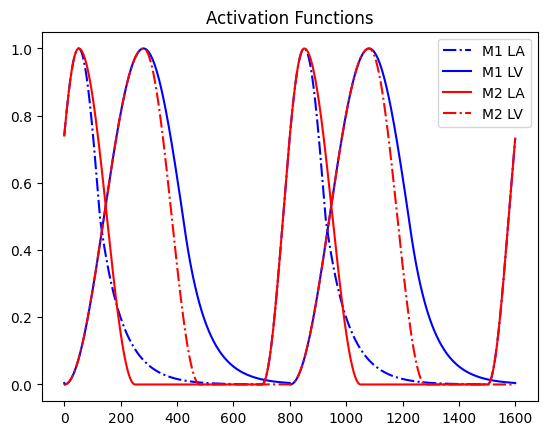

In [66]:
af_lv_1 = np.vectorize(model1.commponents['lv']._af) 
af_la_1 = np.vectorize(model1.commponents['la']._af) 

af_lv_2 = np.vectorize(model2.commponents['lv']._af) 
af_la_2 = np.vectorize(model2.commponents['la']._af) 

fig, ax = plt.subplots()
ax.plot(t, af_la_1(tc),  linestyle='-.', color='b', label='M1 LA')
ax.plot(t, af_lv_1(tc),  linestyle='-', color='b', label='M1 LV')

ax.plot(t, af_la_2(tc),  linestyle='-', color='r', label='M2 LA')
ax.plot(t, af_lv_2(tc),  linestyle='-.', color='r', label='M2 LV')

ax.set_title('Activation Functions')
ax.legend()

plt.show()

Fluxes

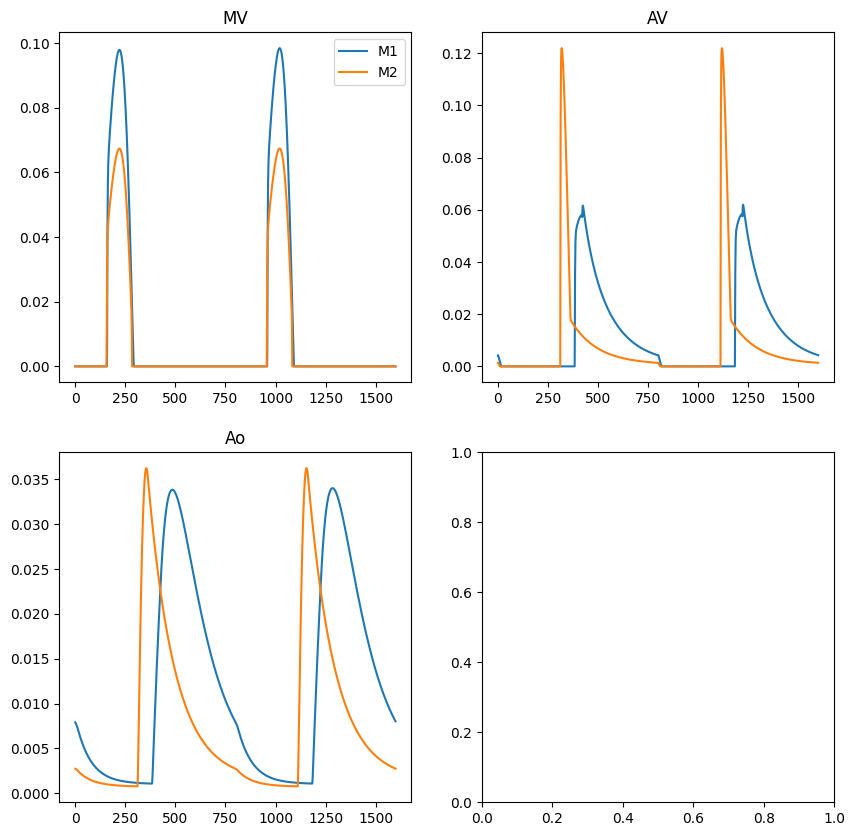

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0][0].set_title('MV')
ax[0][0].plot(t, 
              model1.commponents['mv'].Q_i.values[ind1:ind2], 
              label='M1')
ax[0][0].plot(t, 
              model2.commponents['mv'].Q_i.values[ind1:ind2], 
              label='M2')

ax[0][0].legend()

ax[0][1].set_title('AV')
ax[0][1].plot(t, 
              model1.commponents['av'].Q_i.values[ind1:ind2], 
              label='M1')
ax[0][1].plot(t, 
              model2.commponents['av'].Q_i.values[ind1:ind2], 
              label='M2')

ax[1][0].set_title('Ao')
ax[1][0].plot(t, 
              model1.commponents['ao'].Q_o.values[ind1:ind2], 
              label='M1')
ax[1][0].plot(t, 
              model2.commponents['ao'].Q_o.values[ind1:ind2], 
              label='M2')


plt.show()

Pressure

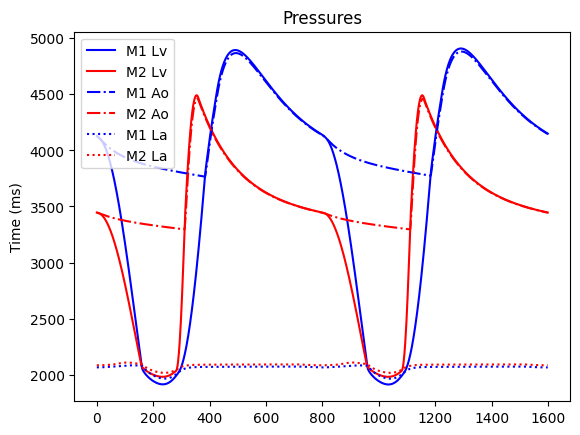

In [57]:
fig, ax = plt.subplots()
ax.plot(t, 
        model1.commponents['lv'].P_i.values[ind1:ind2],
        label='M1 Lv', 
        color='b',
        linestyle='-')
ax.plot(t, 
        model2.commponents['lv'].P_i.values[ind1:ind2],
        label='M2 Lv',
        color='r',
        linestyle='-')

ax.plot(t, 
        model1.commponents['ao'].P_i.values[ind1:ind2],
        label='M1 Ao',
        color='b',
        linestyle='-.')
ax.plot(t, 
        model2.commponents['ao'].P_i.values[ind1:ind2],
        label='M2 Ao',
        color='r',
        linestyle='-.')

ax.plot(t, 
        model1.commponents['la'].P_i.values[ind1:ind2],
        label='M1 La',
        color='b',
        linestyle=':')
ax.plot(t, 
        model2.commponents['la'].P_i.values[ind1:ind2],
        label='M2 La',
        color='r',
        linestyle=':')

ax.legend()
ax.set_ylabel('Time (ms)')
ax.set_title('Pressures')

plt.show()